In [3]:
import pandas as pd

# Load the CSV data into a DataFrame
jokes_df = pd.read_csv('jokes_dataset.csv')

# print the first 5 rows of the DataFrame
print(jokes_df.head())


                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [4]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['clean_joke'] = jokes_df['clean_joke'].apply(remove_punctuation)


Model #1: Simple logistic regression model using TFIDF vectorization.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(jokes_df['text'], jokes_df['humor'], test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

# Train the model using the pipeline
pipe.fit(X_train, y_train)

# Predict on training data
y_train_pred = pipe.predict(X_train)

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on test data
y_pred = pipe.predict(X_test)

# Calculate accuracy score on test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.937725
Test Accuracy: 0.9256


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       False       0.92      0.93      0.93     20001
        True       0.93      0.92      0.93     19999

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



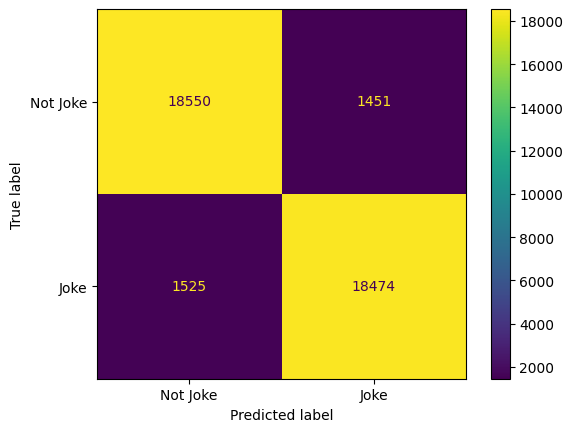

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# assume y_true and y_pred are already defined
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


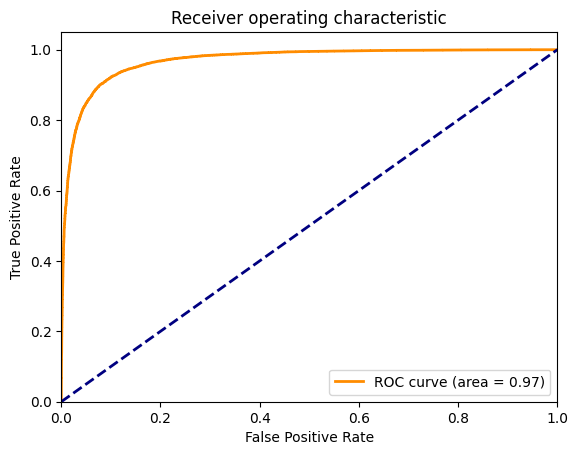

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Calculate ROC curve and AUC score for each class

# Get the predicted probabilities for the positive class
y_proba = pipe.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Model #2: Logistic regression with lemmatization to test if lemmatization will help accuracy.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of documents
def lemmatize_docs(docs):
    lemmatized_docs = []
    for doc in docs:
        tokens = nltk.word_tokenize(doc)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        lemmatized_docs.append(' '.join(lemmatized_tokens))
    return lemmatized_docs


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(jokes_df['text'], jokes_df['humor'], test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

# Train the model using the pipeline
pipe.fit(lemmatize_docs(X_train), y_train)

# Predict on training data
y_train_pred = pipe.predict(lemmatize_docs(X_train))

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on test data
y_pred = pipe.predict(lemmatize_docs(X_test))

# Calculate accuracy score on test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9352375
Test Accuracy: 0.923675


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       False       0.92      0.92      0.92     20001
        True       0.92      0.92      0.92     19999

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000



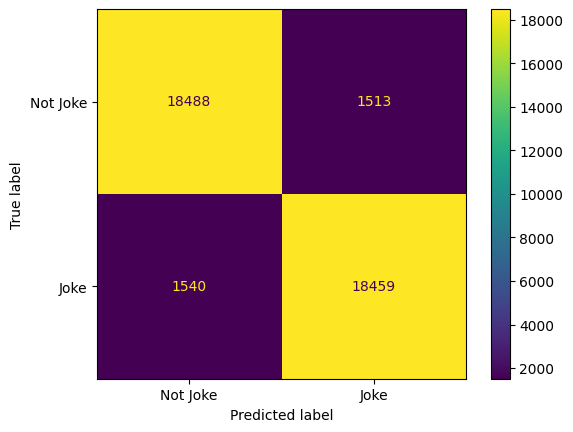

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# assume y_true and y_pred are already defined
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


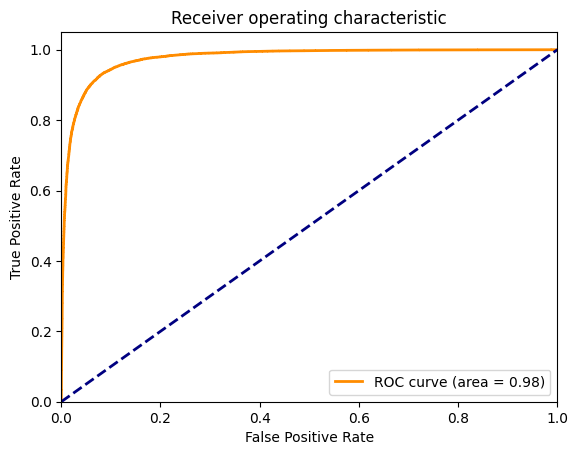

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set
y_pred_proba = pipe.predict_proba(lemmatize_docs(X_test))[:, 1]

# Calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Model #4: Support Vector Machines (SVM) model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(jokes_df['text'], jokes_df['humor'], test_size=0.2, random_state=42)

# Define the pipeline with probability=True in SVC
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', SVC(C=1, kernel='linear', probability=True))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = pipeline.predict(X_train)

# Evaluate the model's accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Train Accuracy: 0.9529125
Test Accuracy: 0.928975


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.93      0.93      0.93     20001
        True       0.93      0.93      0.93     19999

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



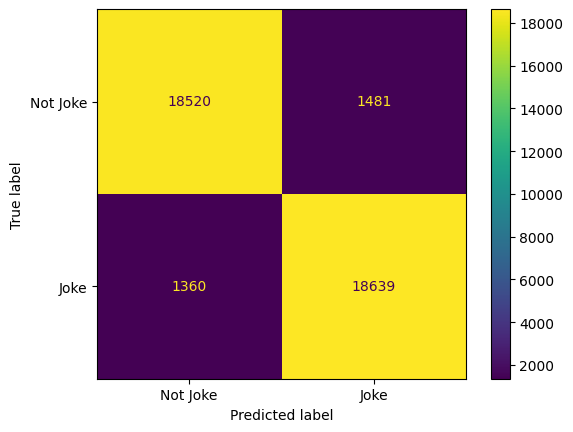

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

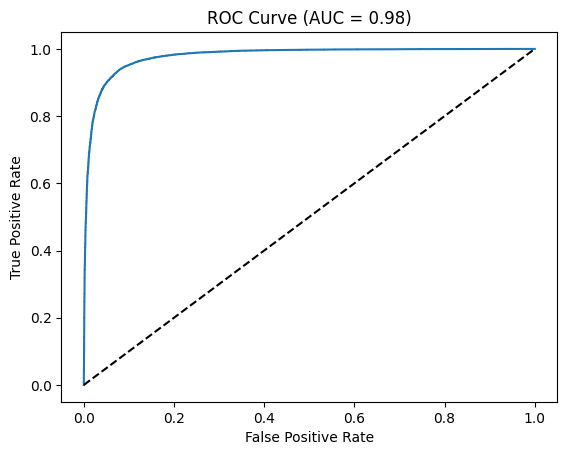

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the test data
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.show()


Model #5: RandomForest 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = jokes_df[['text']]
y = jokes_df['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Train a Random Forest Classifier model
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

# Predict on training data
y_train_pred = clf.predict(X_train_vec)

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on test data
y_pred = clf.predict(X_test_vec)

# Calculate accuracy score on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.99999375
Test Accuracy: 0.918475


Grid search for finding optimal parameters for RF model.

In [ ]:
# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = jokes_sampled[['clean_joke']]
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Define the parameter grid to search
param_grid = {
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [1, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_vec, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)

# Predict on test data using best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_vec)

# Calculate accuracy score on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': 100, 'min_samples_leaf': 1}
Training Accuracy: 0.8241875000000001
Test Accuracy: 0.8245


Final RF model using optimal parameters.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = jokes_df[['clean_joke']]
y = jokes_df['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Set optimal parameters
optimal_params = {'max_depth': 100, 'min_samples_leaf': 1}

# Initialize a random forest classifier with optimal parameters
clf = RandomForestClassifier(**optimal_params)

# Fit the classifier to the training data
clf.fit(X_train_vec, y_train)

# Predict on the training and test data
y_train_pred = clf.predict(X_train_vec)
y_test_pred = clf.predict(X_test_vec)

# Calculate accuracy score on the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.89705
Test Accuracy: 0.854925


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test_pred, y_test)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.84      0.86     21040
        True       0.83      0.87      0.85     18960

    accuracy                           0.85     40000
   macro avg       0.85      0.86      0.85     40000
weighted avg       0.86      0.85      0.86     40000



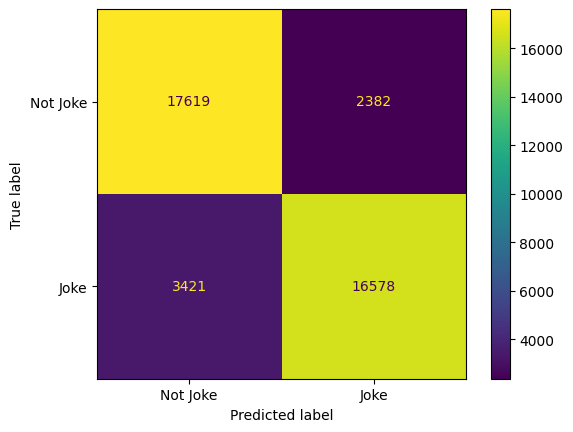

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

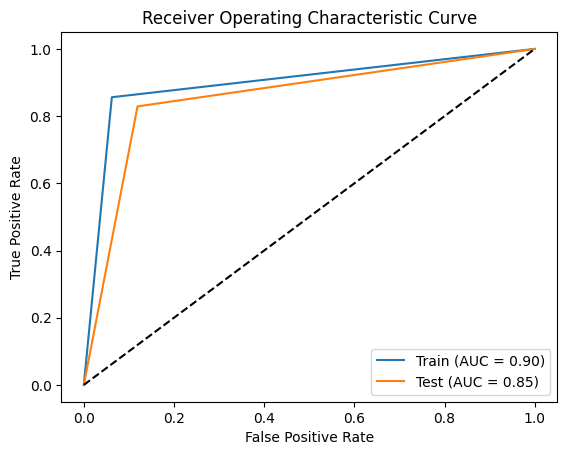

In [ ]:
# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train, tpr_train, label='Train (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

Model #6: K nearest neighbors

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=30000, random_state=42)


# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Define a range of hyperparameters to try
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'cosine']}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_vec, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Train a KNN classifier model with the best hyperparameters found by grid search
clf = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                           weights=grid_search.best_params_['weights'], 
                           metric=grid_search.best_params_['metric'])
clf.fit(X_train_vec, y_train)

# Predict on training data
y_train_pred = clf.predict(X_train_vec)

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on test data
y_pred = clf.predict(X_test_vec)

# Calculate accuracy score on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}
Cross-validation score: 0.8484999999999999
Training Accuracy: 1.0
Test Accuracy: 0.853


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = jokes_df['text]
y = jokes_df['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create the GradientBoostingClassifier object
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_split=5)

# Fit the classifier to the training data
clf.fit(X_train_vec, y_train)

# Predict on training data
y_train_pred = clf.predict(X_train_vec)

# Predict on test data
y_test_pred = clf.predict(X_test_vec)

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate accuracy score on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.77714375
Test Accuracy: 0.774775


Model #7: XGBoost classification model

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=30000, random_state=42)


# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01]
}

# Train an XGBoost classifier model with grid search for hyperparameter tuning
clf = XGBClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

# Print the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on training data with the best model from grid search
y_train_pred = grid_search.best_estimator_.predict(X_train_vec)

# Calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on test data with the best model from grid search
y_pred = grid_search.best_estimator_.predict(X_test_vec)

# Calculate accuracy score on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.8609583333333333
Training Accuracy: 0.8774583333333333
Test Accuracy: 0.8528333333333333


Model # : Stacking model with XYZ

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.squeeze())
X_test_vec = vectorizer.transform(X_test.squeeze())

# Create the base models
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC(probability=True)

# Create the stacking model
estimators = [('logistic', logreg),
              ('rf', rf),
              ('svm', svm)]

stacking_model = StackingClassifier(estimators=estimators,
                                    final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = stacking_model.predict(X_test_vec)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the train and test accuracy
train_acc = accuracy_score(y_train, stacking_model.predict(X_train_vec))
test_acc = accuracy_score(y_test, y_pred)

# Print the train and test accuracy
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)


Train accuracy: 0.9956666666666667
Test accuracy: 0.9133333333333333


Will now iterate multiple neural network models.

Model #8: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 25s 24ms/step - loss: 0.3124 - accuracy: 0.8774 - val_loss: 0.2433 - val_accuracy: 0.9000
Epoch 2/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.1158 - accuracy: 0.9577 - val_loss: 0.2761 - val_accuracy: 0.8938
Epoch 3/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.3613 - val_accuracy: 0.8882
Epoch 4/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.4417 - val_accuracy: 0.8870
Epoch 5/10
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.5579 - val_accuracy: 0.8865
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.6598 - val_accuracy: 0.8817
Epoch 7/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.7474 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 6ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


125/125 [==============================] - 1s 6ms/step - loss: 0.9109 - accuracy: 0.8835
Train Loss: 0.00012293159670662135
Train Accuracy: 1.0
Test Loss: 0.9109343886375427
Test Accuracy: 0.8834999799728394


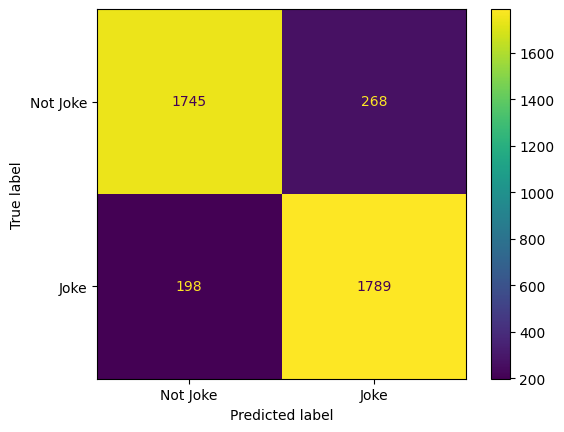

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


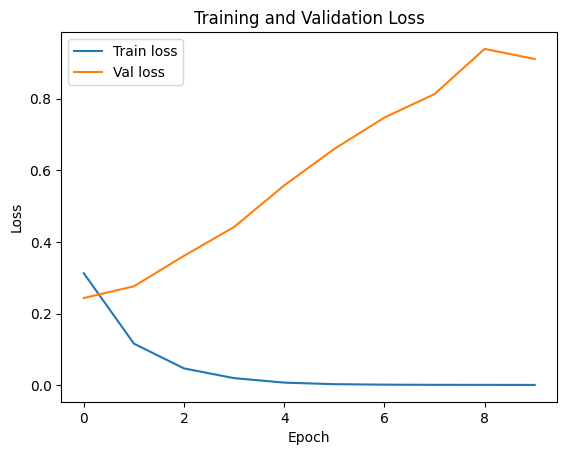

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.90      0.87      0.88      2013
        True       0.87      0.90      0.88      1987

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



Overfitting, so will be adding L2 regularization to the model.

Model #9: Neural network with L2 regularization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))



Epoch 1/10
1000/1000 [==============================] - 32s 31ms/step - loss: 0.6902 - accuracy: 0.8270 - val_loss: 0.6229 - val_accuracy: 0.8587
Epoch 2/10
1000/1000 [==============================] - 24s 24ms/step - loss: 0.6134 - accuracy: 0.8688 - val_loss: 0.5975 - val_accuracy: 0.8692
Epoch 3/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.5959 - accuracy: 0.8747 - val_loss: 0.5755 - val_accuracy: 0.8790
Epoch 4/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.5807 - accuracy: 0.8744 - val_loss: 0.5673 - val_accuracy: 0.8840
Epoch 5/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5718 - accuracy: 0.8766 - val_loss: 0.5625 - val_accuracy: 0.8817
Epoch 6/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5601 - accuracy: 0.8820 - val_loss: 0.5457 - val_accuracy: 0.8852
Epoch 7/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5504 - accuracy: 0.8834 - val_loss: 0.5448 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 6ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


125/125 [==============================] - 1s 6ms/step - loss: 0.5282 - accuracy: 0.8835
Train Loss: 0.4605254828929901
Train Accuracy: 0.925000011920929
Test Loss: 0.5281804800033569
Test Accuracy: 0.8834999799728394


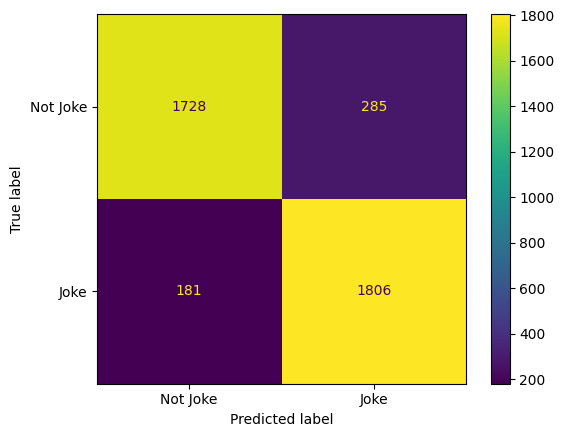

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


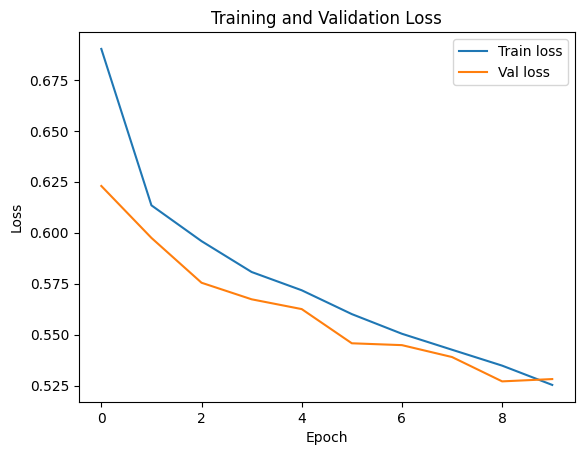

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Updating architecture of model to try and improve accuracy. Try without L2 regularization and with increased dropout rate.

Model #10: Neural network with dropout

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# take a random sample of 20000 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 26s 25ms/step - loss: 0.3614 - accuracy: 0.8445 - val_loss: 0.2329 - val_accuracy: 0.9035
Epoch 2/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.1644 - accuracy: 0.9414 - val_loss: 0.2489 - val_accuracy: 0.8980
Epoch 3/10
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0898 - accuracy: 0.9677 - val_loss: 0.2905 - val_accuracy: 0.9013
Epoch 4/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.3447 - val_accuracy: 0.8942
Epoch 5/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.4088 - val_accuracy: 0.8910
Epoch 6/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.4590 - val_accuracy: 0.8947
Epoch 7/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.5367 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 5ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 1s 6ms/step - loss: 0.6635 - accuracy: 0.8888
Train Loss: 0.0007486914983019233
Train Accuracy: 0.999875009059906
Test Loss: 0.6635462641716003
Test Accuracy: 0.8887500166893005


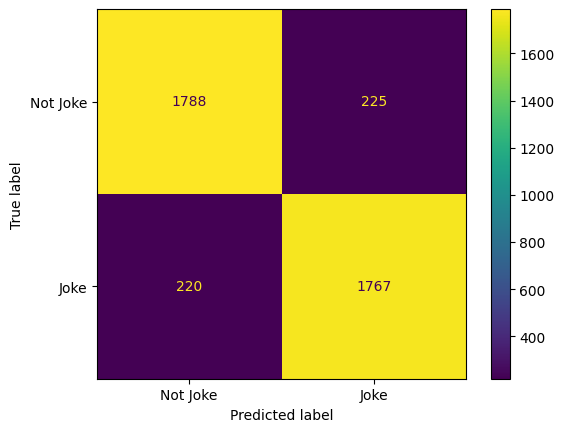

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()


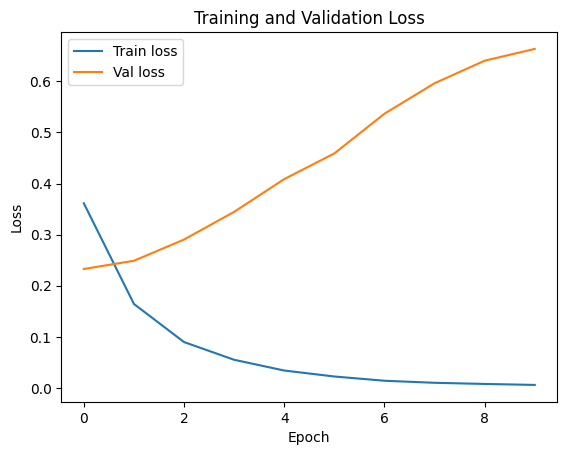

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Try 20% dropout with L2 regularization.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the neural network model with 20% dropout and L2 regularization
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test))


Epoch 1/10
1000/1000 [==============================] - 26s 25ms/step - loss: 0.6977 - accuracy: 0.8299 - val_loss: 0.6319 - val_accuracy: 0.8547
Epoch 2/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.6233 - accuracy: 0.8654 - val_loss: 0.6124 - val_accuracy: 0.8680
Epoch 3/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.6133 - accuracy: 0.8692 - val_loss: 0.6054 - val_accuracy: 0.8735
Epoch 4/10
1000/1000 [==============================] - 26s 25ms/step - loss: 0.5943 - accuracy: 0.8746 - val_loss: 0.5668 - val_accuracy: 0.8867
Epoch 5/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5795 - accuracy: 0.8755 - val_loss: 0.5621 - val_accuracy: 0.8855
Epoch 6/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5726 - accuracy: 0.8784 - val_loss: 0.5588 - val_accuracy: 0.8845
Epoch 7/10
1000/1000 [==============================] - 24s 24ms/step - loss: 0.5569 - accuracy: 0.8776 - val_loss: 0.5431 -

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)


125/125 [==============================] - 1s 11ms/step


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 1s 11ms/step - loss: 0.5140 - accuracy: 0.8890
Train Loss: 0.45767292380332947
Train Accuracy: 0.9241874814033508
Test Loss: 0.5139629244804382
Test Accuracy: 0.8889999985694885


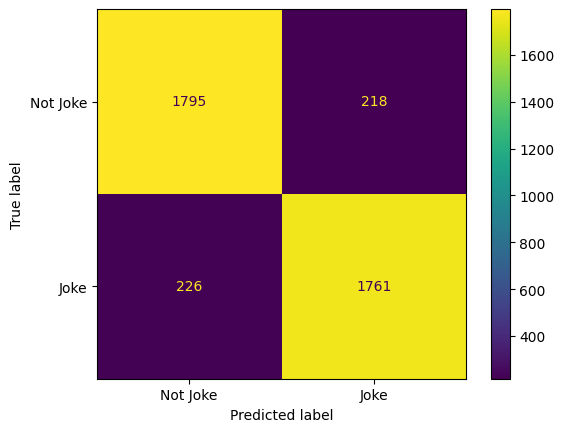

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

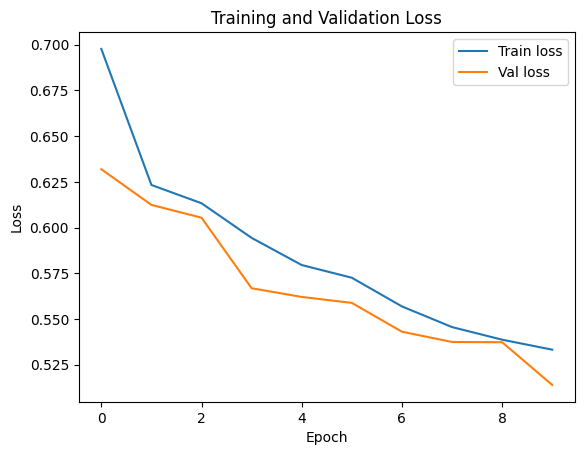

In [ ]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import numpy as np

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled[['text']]
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = X_train.to_numpy().squeeze()
X_test = X_test.to_numpy().squeeze()

# vectorize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define batch size and number of epochs
batch_size = 16
epochs = 20

# Build the neural network model with 20% dropout and L2 regularization
input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train_vec.toarray(), y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_vec.toarray(), y_test), callbacks=[early_stopping])



Epoch 1/20
1000/1000 [==============================] - 35s 34ms/step - loss: 0.6974 - accuracy: 0.8213 - val_loss: 0.6048 - val_accuracy: 0.8748
Epoch 2/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.6129 - accuracy: 0.8663 - val_loss: 0.5931 - val_accuracy: 0.8840
Epoch 3/20
1000/1000 [==============================] - 22s 22ms/step - loss: 0.6028 - accuracy: 0.8701 - val_loss: 0.5716 - val_accuracy: 0.8815
Epoch 4/20
1000/1000 [==============================] - 21s 21ms/step - loss: 0.5879 - accuracy: 0.8742 - val_loss: 0.5738 - val_accuracy: 0.8758
Epoch 5/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5762 - accuracy: 0.8808 - val_loss: 0.5511 - val_accuracy: 0.8835
Epoch 6/20
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5665 - accuracy: 0.8799 - val_loss: 0.5578 - val_accuracy: 0.8835
Epoch 7/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.5569 - accuracy: 0.8819 - val_loss: 0.5559 -

In [7]:
# Predict on test data
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 1s 6ms/step


In [8]:
train_loss, train_accuracy = model.evaluate(X_train_vec.toarray(), y_train)
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 1s 6ms/step - loss: 0.4990 - accuracy: 0.8898
Train Loss: 0.41447412967681885
Train Accuracy: 0.9378125071525574
Test Loss: 0.4989932179450989
Test Accuracy: 0.8897500038146973


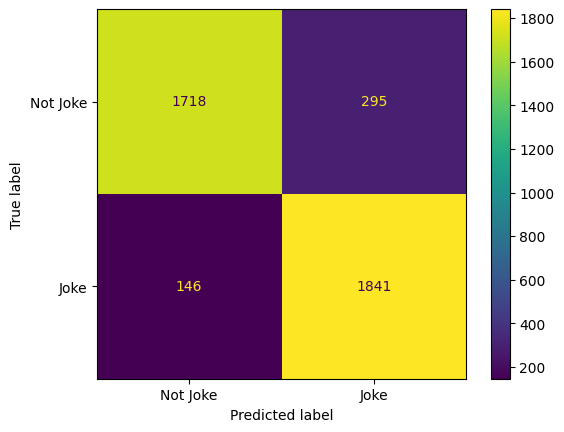

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

Build CNN model for classification. Defines a CNN model with an Embedding layer, two Conv1D layers, a MaxPooling1D layer, a GlobalMaxPooling1D layer, two Dense layers, and a Dropout layer.

Model #10: CNN 

In [11]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences



# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled['text'].to_numpy()
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
maxlen = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the CNN model with 20% dropout and L2 regularization
input_dim = X_train_padded.shape[1]
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test))


Epoch 1/10
1000/1000 [==============================] - 28s 27ms/step - loss: 0.4458 - accuracy: 0.8707 - val_loss: 0.3015 - val_accuracy: 0.9060
Epoch 2/10
1000/1000 [==============================] - 27s 27ms/step - loss: 0.2229 - accuracy: 0.9435 - val_loss: 0.2628 - val_accuracy: 0.9175
Epoch 3/10
1000/1000 [==============================] - 36s 36ms/step - loss: 0.1524 - accuracy: 0.9696 - val_loss: 0.2614 - val_accuracy: 0.9180
Epoch 4/10
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1106 - accuracy: 0.9843 - val_loss: 0.2722 - val_accuracy: 0.9187
Epoch 5/10
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0869 - accuracy: 0.9898 - val_loss: 0.2799 - val_accuracy: 0.9112
Epoch 6/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0689 - accuracy: 0.9940 - val_loss: 0.3144 - val_accuracy: 0.9045
Epoch 7/10
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0552 - accuracy: 0.9964 - val_loss: 0.3514 -

In [12]:
# Predict on test data
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 1s 7ms/step


In [13]:
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 1s 7ms/step - loss: 0.3361 - accuracy: 0.9080
Train Loss: 0.029003361240029335
Train Accuracy: 0.9996874928474426
Test Loss: 0.3361179828643799
Test Accuracy: 0.9079999923706055


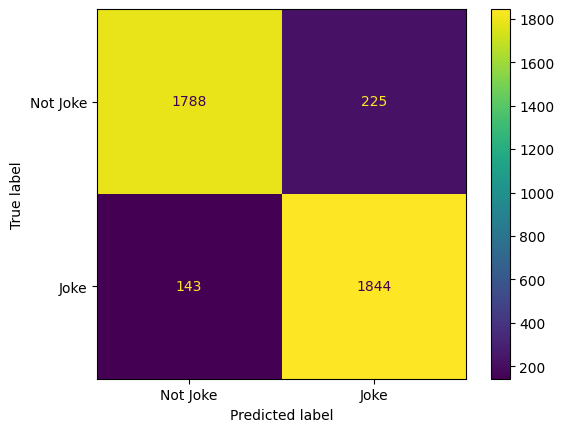

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

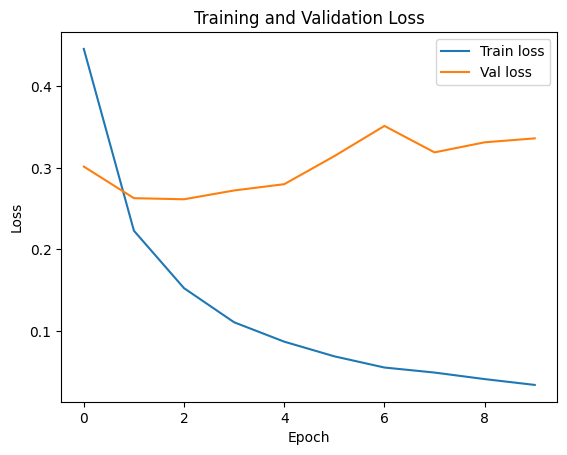

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Update regularization strength and dropout rate.

In [17]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences



# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled['text'].to_numpy()
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
maxlen = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the CNN model with L2 regularization
input_dim = X_train_padded.shape[1]
l2_strength = 0.01
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test))


Epoch 1/10
1000/1000 [==============================] - 30s 29ms/step - loss: 0.4679 - accuracy: 0.8648 - val_loss: 0.2976 - val_accuracy: 0.9097
Epoch 2/10
1000/1000 [==============================] - 31s 31ms/step - loss: 0.2426 - accuracy: 0.9428 - val_loss: 0.2818 - val_accuracy: 0.9085
Epoch 3/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.1766 - accuracy: 0.9647 - val_loss: 0.2650 - val_accuracy: 0.9175
Epoch 4/10
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1307 - accuracy: 0.9800 - val_loss: 0.2697 - val_accuracy: 0.9190
Epoch 5/10
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1049 - accuracy: 0.9866 - val_loss: 0.3084 - val_accuracy: 0.9112
Epoch 6/10
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0864 - accuracy: 0.9906 - val_loss: 0.3060 - val_accuracy: 0.9112
Epoch 7/10
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0717 - accuracy: 0.9934 - val_loss: 0.3158 -

In [18]:
# Predict on test data
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 1s 7ms/step


In [19]:
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 2s 16ms/step - loss: 0.3513 - accuracy: 0.9030
Train Loss: 0.03798871859908104
Train Accuracy: 0.9990000128746033
Test Loss: 0.35131698846817017
Test Accuracy: 0.902999997138977


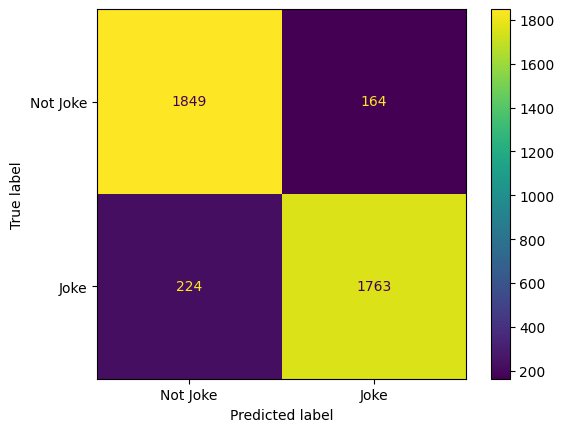

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

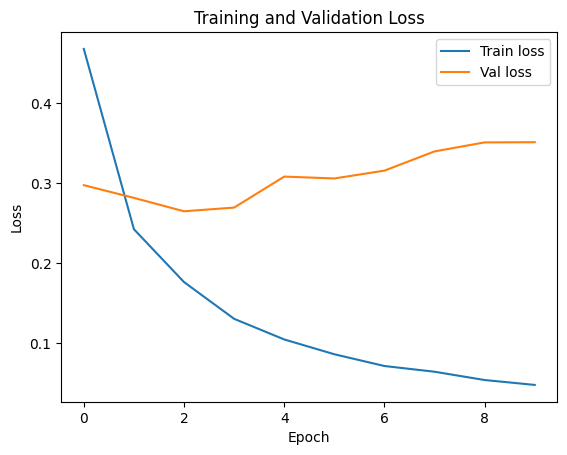

In [21]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Building a recurrent neural network (RNN) model for the same neural net archtiecture, replacing the Conv1D layer in the previous code with a recurrent layer LSTM.

Model #11: RNN 

In [22]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled['text'].to_numpy()
y = jokes_sampled['humor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
maxlen = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Build the RNN model with L2 regularization
input_dim = X_train_padded.shape[1]
l2_strength = 0.01
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(LSTM(64, kernel_regularizer=regularizers.l2(l2_strength)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test))


Epoch 1/10
1000/1000 [==============================] - 80s 78ms/step - loss: 0.4720 - accuracy: 0.8498 - val_loss: 0.2496 - val_accuracy: 0.9150
Epoch 2/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.1951 - accuracy: 0.9378 - val_loss: 0.2399 - val_accuracy: 0.9190
Epoch 3/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.1330 - accuracy: 0.9601 - val_loss: 0.2591 - val_accuracy: 0.9082
Epoch 4/10
1000/1000 [==============================] - 78s 78ms/step - loss: 0.1085 - accuracy: 0.9676 - val_loss: 0.2767 - val_accuracy: 0.9020
Epoch 5/10
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0801 - accuracy: 0.9777 - val_loss: 0.2915 - val_accuracy: 0.8997
Epoch 6/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.0815 - accuracy: 0.9783 - val_loss: 0.3208 - val_accuracy: 0.9018
Epoch 7/10
1000/1000 [==============================] - 81s 81ms/step - loss: 0.0487 - accuracy: 0.9874 - val_loss: 0.3344 -

In [23]:
# Predict on test data
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

125/125 [==============================] - 3s 19ms/step


In [24]:
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 [==============================] - 2s 20ms/step - loss: 0.4024 - accuracy: 0.8938
Train Loss: 0.019605202600359917
Train Accuracy: 0.9971250295639038
Test Loss: 0.40235286951065063
Test Accuracy: 0.893750011920929


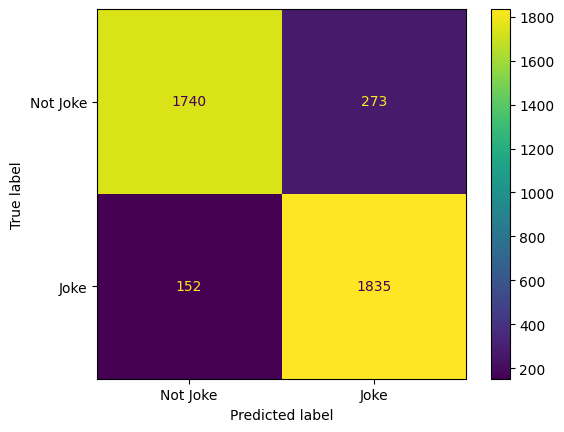

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

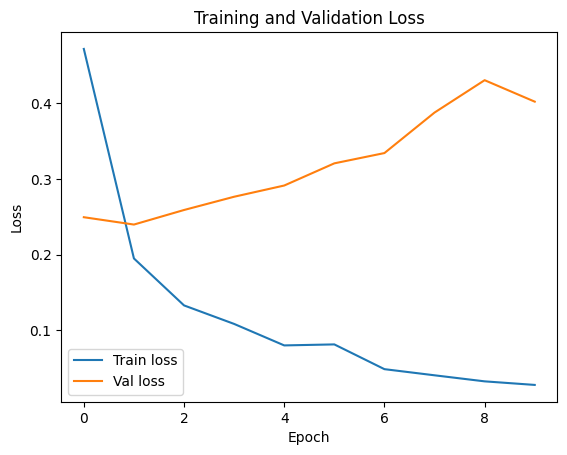

In [26]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model #12: Naive Bayes

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled['text'].to_numpy()
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vect, y_train)


MultinomialNB()

In [28]:
# Evaluate the model on the test set
y_pred_train = model.predict(X_train_vect)
y_pred_test = model.predict(X_test_vect)

In [29]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.942
Test Accuracy: 0.89425


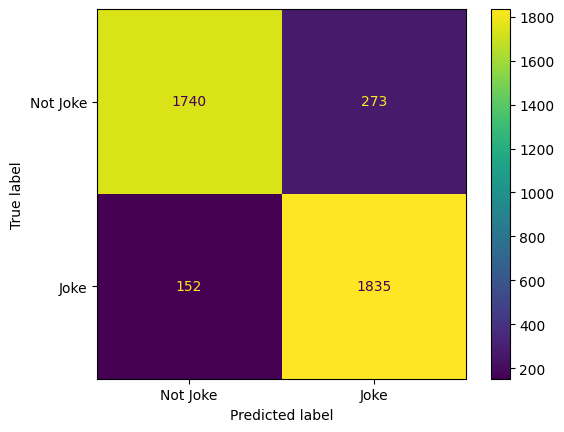

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

In [31]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.92      0.86      0.89      2013
        True       0.87      0.92      0.90      1987

    accuracy                           0.89      4000
   macro avg       0.90      0.89      0.89      4000
weighted avg       0.90      0.89      0.89      4000



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# take a random sample of 500 rows
jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = jokes_sampled['text'].to_numpy()
y = jokes_sampled['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)



MultinomialNB()

In [34]:

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)

In [35]:
train_accuracy = accuracy_score(y_train, model.predict(X_train_tfidf))
test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9421875
Test Accuracy: 0.89175


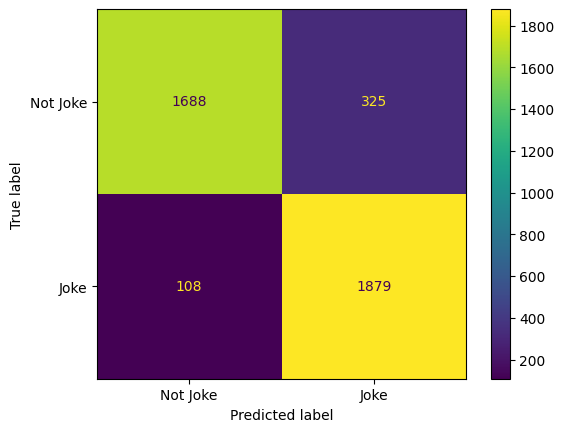

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

In [37]:
from sklearn.metrics import classification_report

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.94      0.84      0.89      2013
        True       0.85      0.95      0.90      1987

    accuracy                           0.89      4000
   macro avg       0.90      0.89      0.89      4000
weighted avg       0.90      0.89      0.89      4000



The best performing model is SVC using TFIDF vectorization so we will export a pkl file to run in streamlit app. This model will now be trained on the full dataset without test train split.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

X = jokes_df['text']
y = jokes_df['humor']

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', SVC(C=1, kernel='linear'))
])

pipeline.fit(X,y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Joke", "Joke"])
disp.plot()

In [ ]:
# get classification report
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
import joblib

# save it as 'model.pkl' in the current working directory
joblib.dump(pipeline, 'model.pkl')

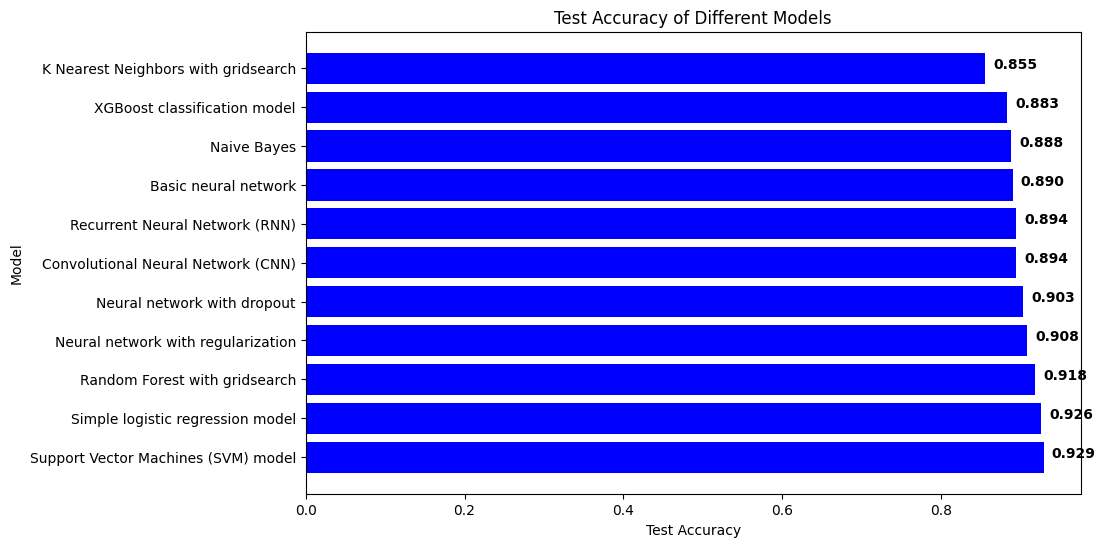

In [ ]:
import matplotlib.pyplot as plt

models = ['Simple logistic regression model', 'Support Vector Machines (SVM) model', 'Random Forest with gridsearch', 'K Nearest Neighbors with gridsearch', 'XGBoost classification model', 'Basic neural network', 'Neural network with regularization', 'Neural network with dropout', 'Convolutional Neural Network (CNN)', 'Recurrent Neural Network (RNN)', 'Naive Bayes']
train_accuracy = [0.938, 0.953, 1.000, 0.897, 1.000, 0.938, 0.999, 0.999, 0.997, 0.942, 0.946]
test_accuracy = [0.926, 0.929, 0.918, 0.855, 0.883, 0.890, 0.908, 0.903, 0.894, 0.894, 0.888]

# Sort the models and test accuracies by descending order of test accuracy
models, test_accuracy = zip(*sorted(zip(models, test_accuracy), key=lambda x: x[1], reverse=True))

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(models, test_accuracy, color='blue')

# Add the train accuracy value for each model as a label on the bars
for i, v in enumerate(test_accuracy):
    ax.text(test_accuracy[i] + 0.01, i, f'{v:.3f}', color='black', fontweight='bold')

# Set the title and axis labels
ax.set_title('Test Accuracy of Different Models')
ax.set_xlabel('Test Accuracy')
ax.set_ylabel('Model')

# Show the plot
plt.show()

